In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
#Loading data
heart_data=pd.read_csv('C:/Users/user/Desktop/HeartDiseaseTrain-Test.csv')

In [3]:
#Display first 5 rows of the dataset
heart_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
#Display last 5 rows of the dataset
heart_data.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [5]:
#Find shape of Dataset(no. of rows and columns)
heart_data.shape

(1025, 14)

In [6]:
#Get information about Dataset like total no. of rows,columns,datatype of each column and memory requirement
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [7]:
#Checking null values in Dataset
heart_data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [8]:
#Get overall Statistics about Dataset
heart_data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [9]:
#How many peoples having heart disease and how many are with healthy hearts
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: xlabel='Max_heart_rate', ylabel='cholestoral'>

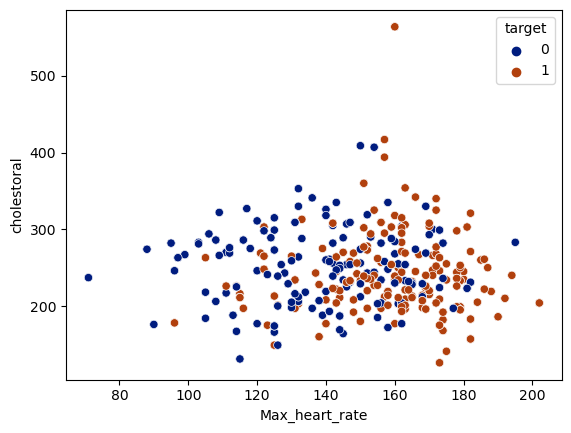

In [10]:
sns.scatterplot(data=heart_data,x='Max_heart_rate',y='cholestoral',hue='target',palette='dark')

In [11]:
#How many Female and how many Male in dataset
heart_data['sex'].value_counts()

Male      713
Female    312
Name: sex, dtype: int64

In [12]:
#Draw Correlation matrix
corr_matrix=heart_data.corr()
corr_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_11692\1741170022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=heart_data.corr()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.229324
resting_blood_pressure,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.138772
cholestoral,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.099966
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,0.422895
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,-0.438441
target,-0.229324,-0.138772,-0.099966,0.422895,-0.438441,1.000000


<Axes: >

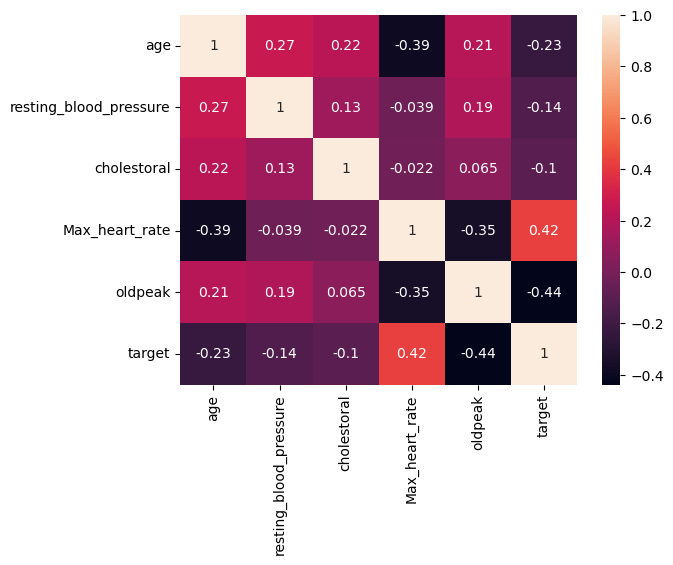

In [13]:
#plotting heatmap
sns.heatmap(corr_matrix,annot=True)

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

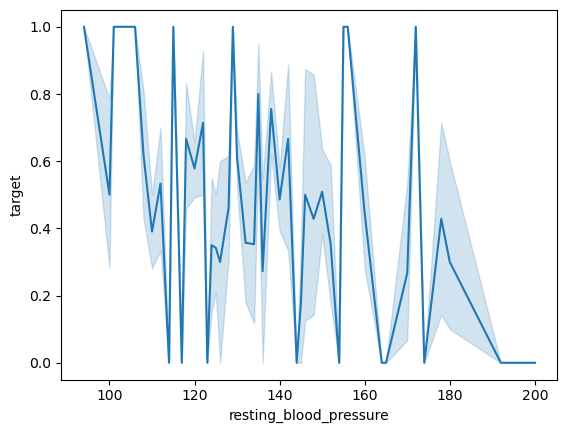

In [14]:
#Plotting lineplot
sns.lineplot(data=heart_data,x='resting_blood_pressure',y='target')

In [15]:
from sklearn.preprocessing import LabelEncoder 
cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy','thalassemia']
heart_data[cols] = heart_data[cols].apply(LabelEncoder().fit_transform)



In [16]:
#splitting data into target and features
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [17]:
X

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [19]:
#splitting into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,random_state=2)

In [20]:
# selecting model
model=LogisticRegression()

In [21]:
# Training model
model.fit(X_train,Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#predicting accuracy of training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [23]:
training_data_accuracy

0.85

In [24]:
#predicting accuracy of testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy =score_lr= accuracy_score(X_test_prediction,Y_test)

In [25]:
score_lr

0.7853658536585366

#DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier


In [27]:
cls=DecisionTreeClassifier()

In [28]:
# Traing model
cls.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
prd=cls.predict(X_test)

In [30]:
prd

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [31]:
# Predicting accuracy for testing target data
from sklearn import metrics
score_dtr=metrics.accuracy_score(Y_test,prd)

In [32]:
score_dtr

0.9853658536585366

#Naive Bayes


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


In [34]:
#Scaling or normalizing 
sc=StandardScaler()

In [35]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [36]:
model=GaussianNB()

In [37]:
#Traing model
model.fit(X_train,Y_train)

GaussianNB()

In [38]:
prd=model.predict(X_test)

In [39]:
prd

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [40]:
# accuracy prediction on testing target data
score_nb=accuracy_score(Y_test,prd)

In [41]:
score_nb

0.7804878048780488

#Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
rd=RandomForestClassifier(n_estimators=40)

In [44]:
#Training model
rd.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=40)

In [45]:
# Prediction for testing data
prd=rd.predict(X_test)

In [46]:
prd

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [47]:
Y_test

845    0
542    1
147    0
711    0
724    1
      ..
889    0
563    0
654    1
943    1
734    0
Name: target, Length: 205, dtype: int64

In [48]:
score_rf=r2_score(Y_test,prd)

In [49]:
score_rf

1.0

In [50]:
mean=mean_squared_error(Y_test,prd)

In [51]:
mean

0.0

In [52]:
#Displaying the top 5 rows of dataset without target column
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0


In [53]:
# Taking Input from user
age=int(input('enter your age:'))
sex=int(input('enter gender:'))
chest_pain_type=int(input('enter chest pain type:'))
resting_blood_pressure=int(input('enter blood pressure:'))
cholestoral=int(input('enter cholestoral level:'))
fasting_blood_sugar=int(input('enter blood suger level:'))
rest_ecg=int(input('enter ecg:'))
Max_heart_rate=int(input('enter heart rate'))
exercise_induced_angina=int(input('enter engina due to exercise:'))
oldpeak=float(input('enter oldpeak:'))
slope=int(input('enter slope:'))
vessels_colored_by_flourosopy=int(input('enter fluroscopy:'))
thalassemia=int(input('enter thalassemia type:'))                                 
                                 

enter your age:30
enter gender:1
enter chest pain type:2
enter blood pressure:120
enter cholestoral level:200
enter blood suger level:0
enter ecg:1
enter heart rate160
enter engina due to exercise:0
enter oldpeak:2.3
enter slope:1
enter fluroscopy:3
enter thalassemia type:2


In [57]:
#Output with Randomforest algorithm
output=rd.predict([[age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia]])

In [58]:
Y_train.head(1)

14    0
Name: target, dtype: int64

In [63]:
if output==0:
    print('person having healthy heart ')
    
else:
    print(' personsuffered from heart disease')
   

person having healthy heart 
